<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/UpdateTF2_0CFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [11]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,GlobalAveragePooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [12]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train,y_test =y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)


x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [13]:
# the data is only 2D!
# Convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
print(x_train.shape)

(50000, 32, 32, 3, 1)


In [14]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense

# Example data shape (adjust this as per your dataset)
# Let's create a dummy x_train for the sake of demonstration
x_train = np.random.random((100, 32, 32, 3))  # 100 samples of 32x32 RGB images
y_train = np.random.randint(0, 10, 100)  # 100 samples with 10 classes

input_shape = x_train.shape[1:]  # Shape without the batch size
K = 10  # Number of classes

# Build the model using the functional API
i = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Print the model summary to verify the architecture
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# You can now evaluate and use the model for predictions


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0     

In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense

# Example data shape (adjust this as per your dataset)
# Creating dummy x_train, y_train, x_test, and y_test for demonstration
x_train = np.random.random((1000, 32, 32, 3))  # 1000 samples of 32x32 RGB images
y_train = np.random.randint(0, 10, 1000)  # 1000 samples with 10 classes
x_test = np.random.random((200, 32, 32, 3))  # 200 samples of 32x32 RGB images for validation
y_test = np.random.randint(0, 10, 200)  # 200 samples with 10 classes for validation

input_shape = x_train.shape[1:]  # Shape without the batch size
K = 10  # Number of classes

# Build the model using the functional API
i = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Print the model summary to verify the architecture
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model without data augmentation first
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Integrate data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2  # Specify a validation split
)

# Fit the model with data augmentation
train_generator = data_generator.flow(x_train, y_train, batch_size=batch_size, subset='training')
validation_generator = data_generator.flow(x_train, y_train, batch_size=batch_size, subset='validation')

history_with_aug = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=len(x_train) * 0.8 // batch_size,  # 80% of data for training
    validation_steps=len(x_train) * 0.2 // batch_size  # 20% of data for validation
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_26 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_27 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0   

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense

# Example data shape (adjust this as per your dataset)
# Creating dummy x_train, y_train, x_test, and y_test for demonstration
x_train = np.random.random((1000, 32, 32, 3))  # 1000 samples of 32x32 RGB images
y_train = np.random.randint(0, 10, 1000)  # 1000 samples with 10 classes
x_test = np.random.random((200, 32, 32, 3))  # 200 samples of 32x32 RGB images for validation
y_test = np.random.randint(0, 10, 200)  # 200 samples with 10 classes for validation

input_shape = x_train.shape[1:]  # Shape without the batch size
K = 10  # Number of classes

# Build the model using the functional API
i = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Print the model summary to verify the architecture
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Initial Training without Data Augmentation
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Data Augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = data_generator.flow(x_train, y_train, batch_size=batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

# Training with Data Augmentation
history_with_aug = model.fit(
    train_generator,
    validation_data=(x_test, y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=50
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_32 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_33 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0   

In [31]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, padding='same', activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2)) (x)
# x = Dropout(0.2)(x)
x= Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x= Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2)) (x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten() (x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu') (x)
x = Dropout(0.2)(x)
x = Dense (K, activation='softmax')(x)

model=Model(i, x)



7/7 [==============================] - 0s 61ms/step
Confusion matrix, without normalization
[[ 0 16  0  0  2  0  0  0  0  0]
 [ 0 16  0  0  2  0  0  0  0  0]
 [ 0 14  0  0  1  0  0  0  0  0]
 [ 0 21  0  0  2  0  0  0  0  0]
 [ 0 16  0  0  5  0  0  0  0  0]
 [ 0 15  0  0  1  0  0  0  0  0]
 [ 0 22  0  0  1  0  0  0  0  0]
 [ 0 22  0  0  2  0  0  0  0  0]
 [ 0 20  0  0  1  0  0  0  0  0]
 [ 0 20  0  0  1  0  0  0  0  0]]


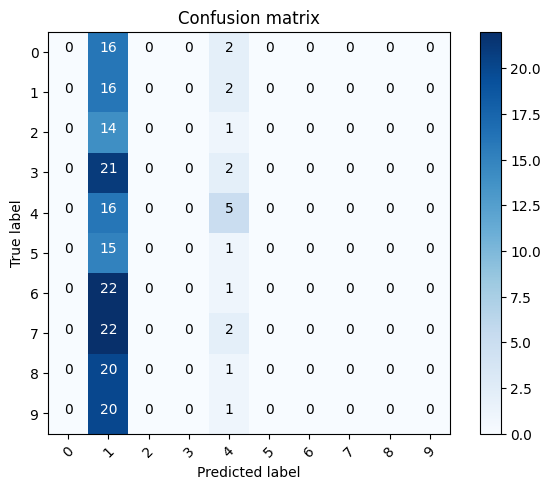

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Define the function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Compute the confusion matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,  p_test)
plot_confusion_matrix(cm, list(range(10)))

7/7 [==============================] - 0s 60ms/step
Confusion matrix, without normalization
[[ 0 16  0  0  2  0  0  0  0  0]
 [ 0 16  0  0  2  0  0  0  0  0]
 [ 0 14  0  0  1  0  0  0  0  0]
 [ 0 21  0  0  2  0  0  0  0  0]
 [ 0 16  0  0  5  0  0  0  0  0]
 [ 0 15  0  0  1  0  0  0  0  0]
 [ 0 22  0  0  1  0  0  0  0  0]
 [ 0 22  0  0  2  0  0  0  0  0]
 [ 0 20  0  0  1  0  0  0  0  0]
 [ 0 20  0  0  1  0  0  0  0  0]]


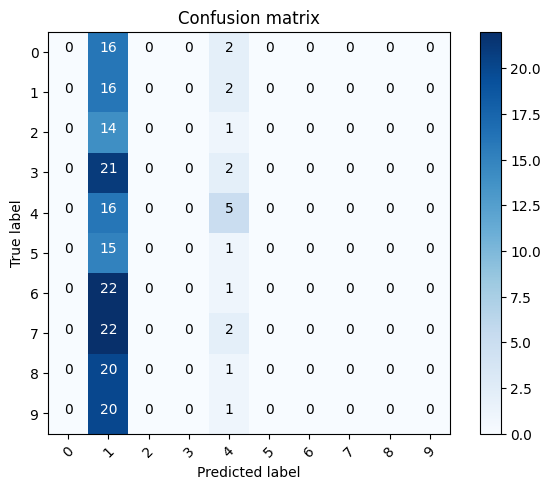

In [44]:
# Compute the confusion matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,  p_test)
plot_confusion_matrix(cm, list(range(10)))

In [45]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()


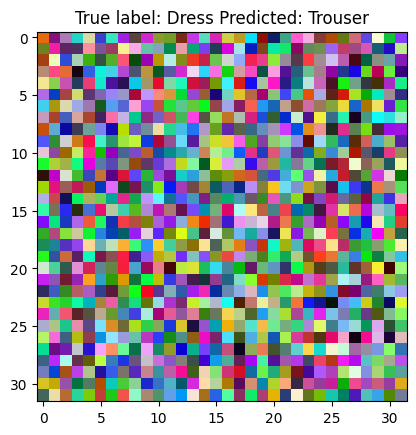

In [46]:
# Function to show misclassified examples
misclassified_idx = np.where(p_test !=  y_test)[0]
i  = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s"  % (labels[y_test[i]], labels[p_test[i]]));
